### Data Set Description:
### Given medical data about different countries from 1990-2018, let's try to predict a patient's average hospital stay.
### Our Goal to applay various regression models to make our predictions(Hospital stay for each pateint).

#### Link for our Data:

#### https://data.oecd.org/healthcare/length-of-hospital-stay.htm 
#### https://data.oecd.org/healtheqt/hospital-beds.htm#indicator-chart

### Important Features: 

### 1. Length of hospital stay:

#### The average number of days that patients spend in hospital. It is generally measured by dividing the total number of days stayed by all inpatients during a year by the number of admissions or discharges.

### 2. Hospital beds:

#### This indicator provides a measure of the resources available for delivering services to inpatients in hospitals in terms of the number of beds that are maintained, staffed, and immediately available for use.It is measured in the number of beds per 1000 inhabitants.

### 3. Computed tomography (CT) scanners:

#### A Computed Tomography (CT) scanner is an x-ray machine that combines many x-ray images with the aid of a computer to generate cross-sectional views. They help physicians diagnose a range of conditions by producing images of internal organs and structures of the body. This indicator is measured in the number of equipment per 1000000 inhabitants. 

### 4. Magnetic resonance imaging (MRI) units:

#### Magnetic Resonance Imaging (MRI) is an imaging technique designed to visualize internal structures of the body using magnetic and electromagnetic fields which induce a resonance effect of hydrogen atoms.MRI units help physicians diagnose a range of conditions by producing images of internal organs and structures of the body. This indicator is measured in the number of equipment per 1000000 inhabitants. 

### 5. Time and Location:
#### The research is limited to OECD countries where all data for 1990-2018 are available at the same time in the database.

# Importind Data:

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

In [5]:
data = pd.read_csv('Healthcare_Investments_and_Hospital_Stay (1).csv')

In [6]:
data.head()

,Location,Time,Hospital_Stay,MRI_Units,CT_Scanners,Hospital_Beds
0,AUS,1992,6.6,1.43,16.71,1.43
1,AUS,1994,6.4,2.36,18.48,2.36
2,AUS,1995,6.5,2.89,20.55,2.89
3,AUS,1996,6.4,2.96,21.95,2.96
4,AUS,1997,6.2,3.53,23.34,3.53


In [7]:
data.shape

(518, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       518 non-null    object 
 1   Time           518 non-null    int64  
 2   Hospital_Stay  518 non-null    float64
 3   MRI_Units      518 non-null    float64
 4   CT_Scanners    518 non-null    float64
 5   Hospital_Beds  518 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 24.4+ KB


### Our Data contains 6 Columns and 518 raws , with not unexpected or missing values.

# Data exploratory and Preprocessing:

In [9]:
# let's make sure there are no missing values in the data
data.isnull().sum()

Location         0
Time             0
Hospital_Stay    0
MRI_Units        0
CT_Scanners      0
Hospital_Beds    0
dtype: int64

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,518.0,2007.967181,6.944160,1990.00,2003.2500,2009.000,2014.0000,2018.00
Hospital_Stay,518.0,7.140154,2.566864,3.40,5.8000,6.650,7.5000,32.70
MRI_Units,518.0,10.565502,8.685570,0.10,4.0725,8.765,13.8775,55.21
CT_Scanners,518.0,19.646718,14.352069,1.48,10.3325,15.375,26.5925,111.49
Hospital_Beds,518.0,10.565502,8.685570,0.10,4.0725,8.765,13.8775,55.21


## Data Visualizaion:

In [11]:
#lets explore some data about available countries
locations = set(data["Location"])
print(f"There are {len(locations)} countries data.\n")

There are 32 countries data.



Text(0.5, 1.0, 'records for each location')

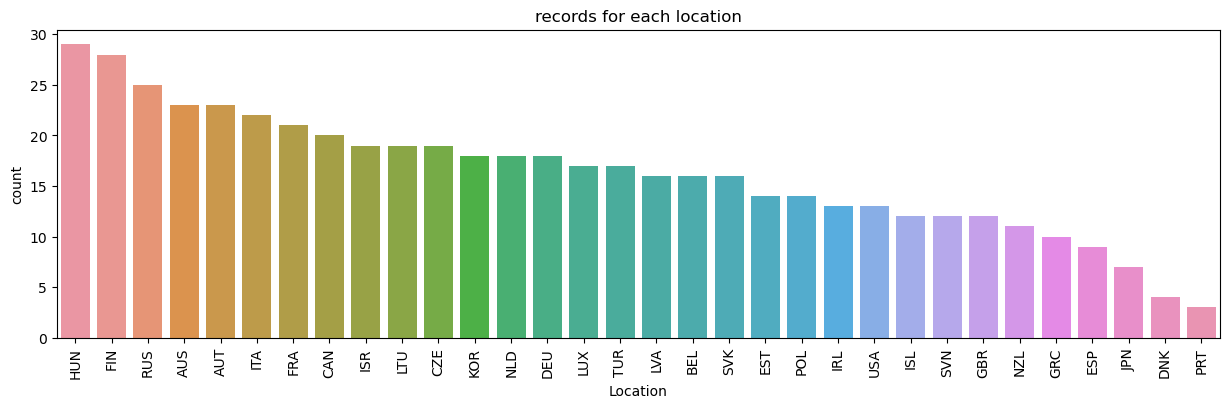

In [12]:
#Now, we can visualize it
fig = plt.figure(figsize=(15, 4))
g = sns.countplot(data=data, x="Location",order = data['Location'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
g.set_title("records for each location")

array([[<Axes: title={'center': 'Time'}>,
        <Axes: title={'center': 'Hospital_Stay'}>],
       [<Axes: title={'center': 'MRI_Units'}>,
        <Axes: title={'center': 'CT_Scanners'}>],
       [<Axes: title={'center': 'Hospital_Beds'}>, <Axes: >]],
      dtype=object)

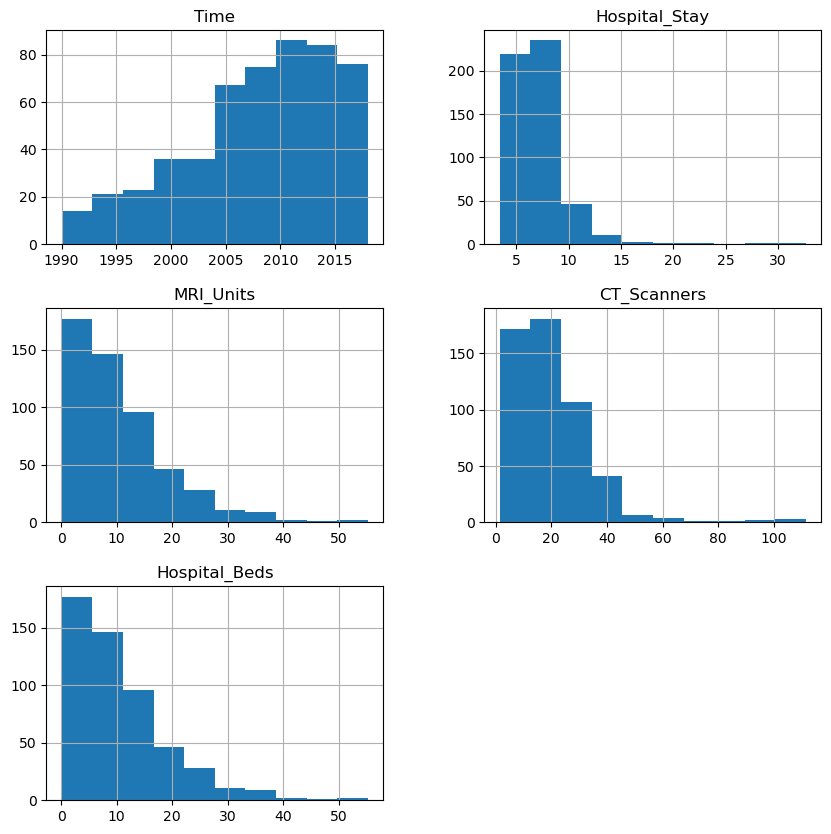

In [13]:
# draw histogram and obtain some info. about other features

data.hist(figsize=(10,10))

In [14]:
print(" The min and max available years in our dataset")
print(f'Minimum year: {min(data["Time"])}')
print(f'Maxmum year: {max(data["Time"])}')

 The min and max available years in our dataset
Minimum year: 1990
Maxmum year: 2018


In [15]:
# Hospital beds dis.
print(f'Minimum Beds for each patient: {min(data["Hospital_Beds"])}')
print(f'Maxmum Beds for each patient: {max(data["Hospital_Beds"])}')

Minimum Beds for each patient: 0.1
Maxmum Beds for each patient: 55.21


### From Our Visualization we noticed that:
#### Location: There are 32 countries data.
#### Time:Year when the data got.>>> Minimum year: 1990 , Max year: 2018
#### Minimum Beds is 0.1 , and Max is 55.21

In [16]:
df = data[['MRI_Units' ,'CT_Scanners','Hospital_Beds' ]]

<Axes: >

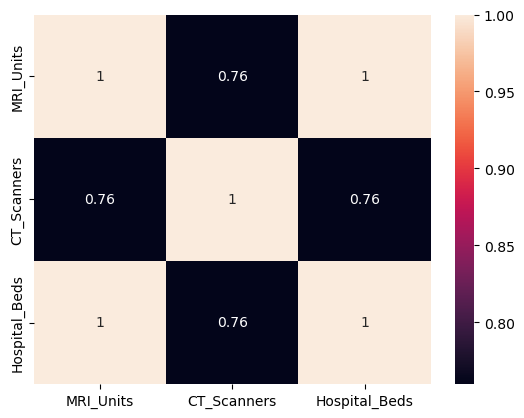

In [17]:
#HeatMap for Correlation for selected features
sns.heatmap(df.corr(), annot = True)

Correlation:


# Modeling:

## Splitting Data:

In [18]:
# we will extract important columns for our analysis without time and location
output = data[['MRI_Units' ,'CT_Scanners','Hospital_Beds','Hospital_Stay' ]]

In [19]:
#separete columns to X contains independent variable and y contains dependent variable
X = output.drop("Hospital_Stay",axis=1)     
y= output["Hospital_Stay"] #We will predict Outcome(Hospital_Stay)

In [20]:
# We will choose almost 30% of dataset as test size.
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3 ,random_state=1)
print('Number of rows in the total set: {}'.format(data.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 518
Number of rows in the training set: 362
Number of rows in the test set: 156


## Regression Models Evaluation:

#### >>> We cannot calculate accuracy for a regression model.
#### >>> The skill or performance of a regression model must be reported as an error in those predictions.
#### >>There are three error metrics that are commonly used for evaluating and reporting the performance of a regression model; they are:

#### 1.  Mean Squared Error (MSE).
#### It is calculated by taking the absolute difference between the predicted values and the actual values and averaging it across the dataset.
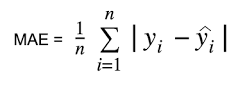

#### 2. Mean Absolute Error (MAE).

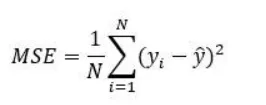

####     Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.

#### 3.  Root Mean Squared Error (RMSE).

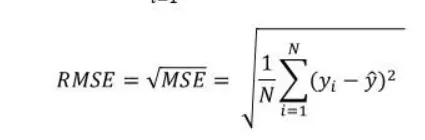  

#### Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals.

### For comparing the accuracy among different linear regression models, RMSE is a better choice.

### 1. KNN : KNeighborsRegressor()

In [21]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred1 = knn.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

Mean Absolute Error: 1.0116666666666667
Mean Squared Error: 2.9066948717948717
Root Mean Squared Error: 1.7049031854609433


### 2. Decision Tree": DecisionTreeRegressor()

In [23]:
Dtree= DecisionTreeRegressor()
Dtree.fit(X_train, y_train)
y_pred3 = Dtree.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

Mean Absolute Error: 1.0724358974358974
Mean Squared Error: 2.7287820512820513
Root Mean Squared Error: 1.6519025550201354
